<a href="https://colab.research.google.com/github/Manjusree3/Fetal-Health-Prediction/blob/main/Fetal_Health_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of DataFrame: (2126, 22)
Columns: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')
Missing Values: 
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       

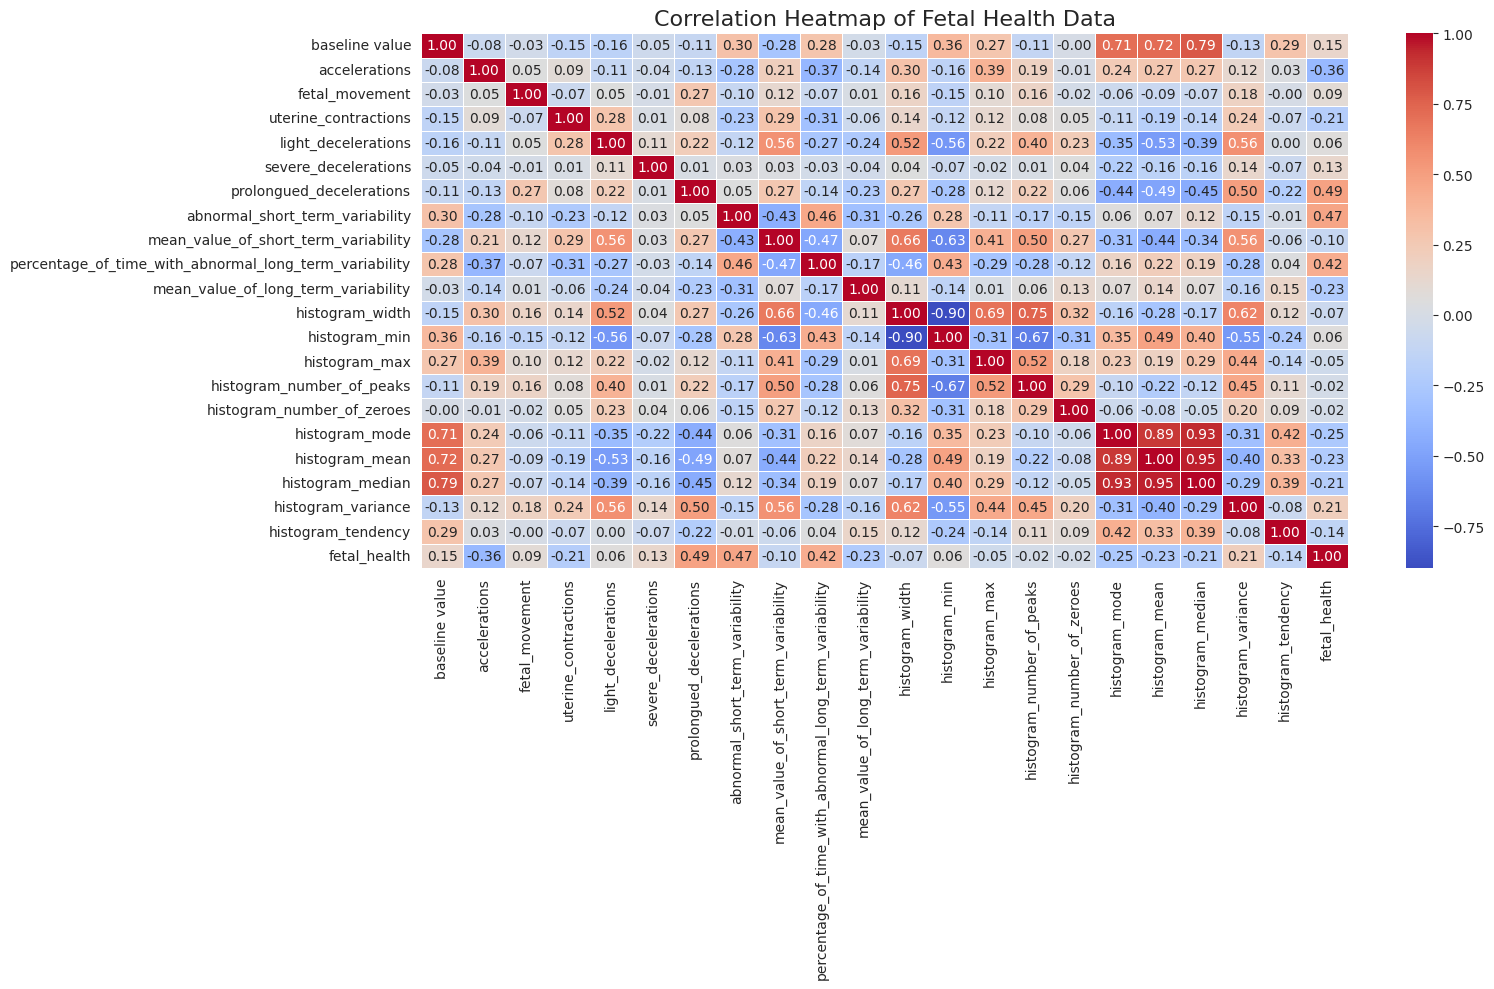

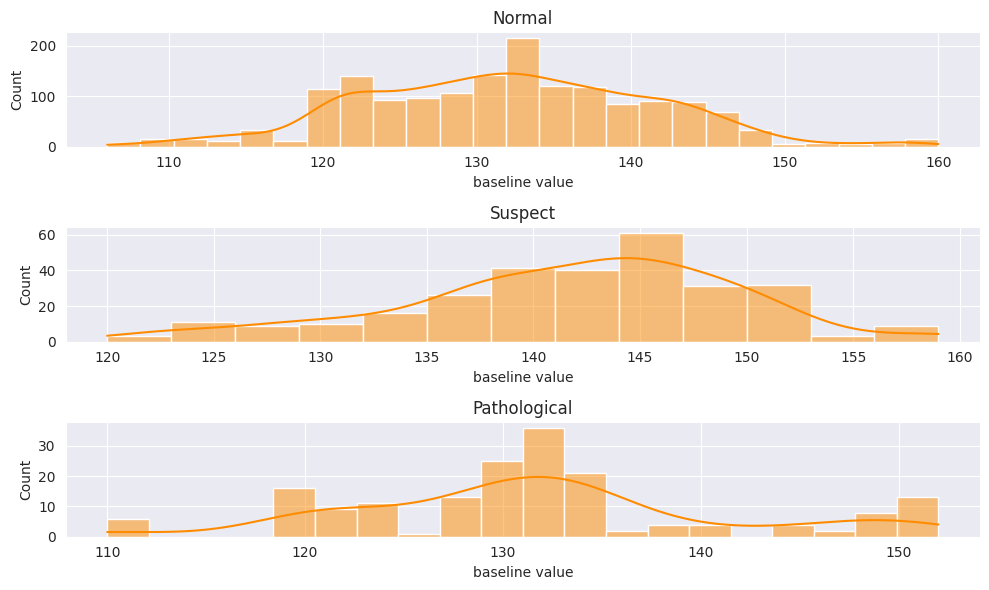

<ipython-input-12-2f091c65d301>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fetal_health', data=df, palette='Set2')


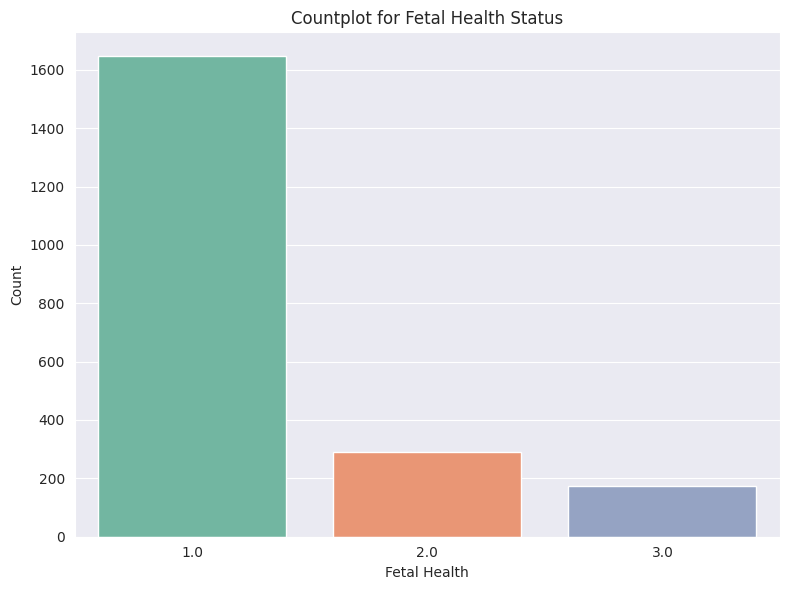

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, KFold

# Models
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Set display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None
sns.set_style("darkgrid")

# Load dataset
df = pd.read_csv('/content/fetal_health(1).csv')
df.head()

# Check the shape and columns
print(f"Shape of DataFrame: {df.shape}")
print(f"Columns: {df.columns}")

# Check missing values
print("Missing Values: ")
print(df.isna().sum().sort_values(ascending=True))

# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# Dataset info and description
df.info()
df.describe()

# Correlation Heatmap (Updated Colors)
plt.figure(figsize=(16, 10))  # Increased size of the plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Fetal Health Data', fontsize=16)
plt.tight_layout()
plt.show()

# Distribution of baseline value for different fetal health statuses (Updated Colors)
plt.figure(figsize=(10, 6))  # Reduced size of the plot
for index, i in enumerate(['Normal', 'Suspect', 'Pathological']):
    plt.subplot(3, 1, index + 1)
    sns.histplot(df[df['fetal_health'] == index + 1]['baseline value'], kde=True, color='darkorange')
    plt.title(i)
plt.tight_layout()
plt.show()

# Countplot for fetal health distribution (Updated Colors)
plt.figure(figsize=(8, 6))  # Reduced size of the plot
sns.countplot(x='fetal_health', data=df, palette='Set2')
plt.title('Countplot for Fetal Health Status')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-8-062315a664a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fetal_health', y='uterine_contractions', data=df, palette='Blues')
<ipython-input-8-062315a664a9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fetal_health', y='severe_decelerations', data=df, palette='Blues')
<ipython-input-8-062315a664a9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fetal_health', y='mean_value_of_short_term_variability', data=df, palette='Blues')
<ipython-input-8-062315a664a9>:16: FutureWarning: 

Passing `palette` without as

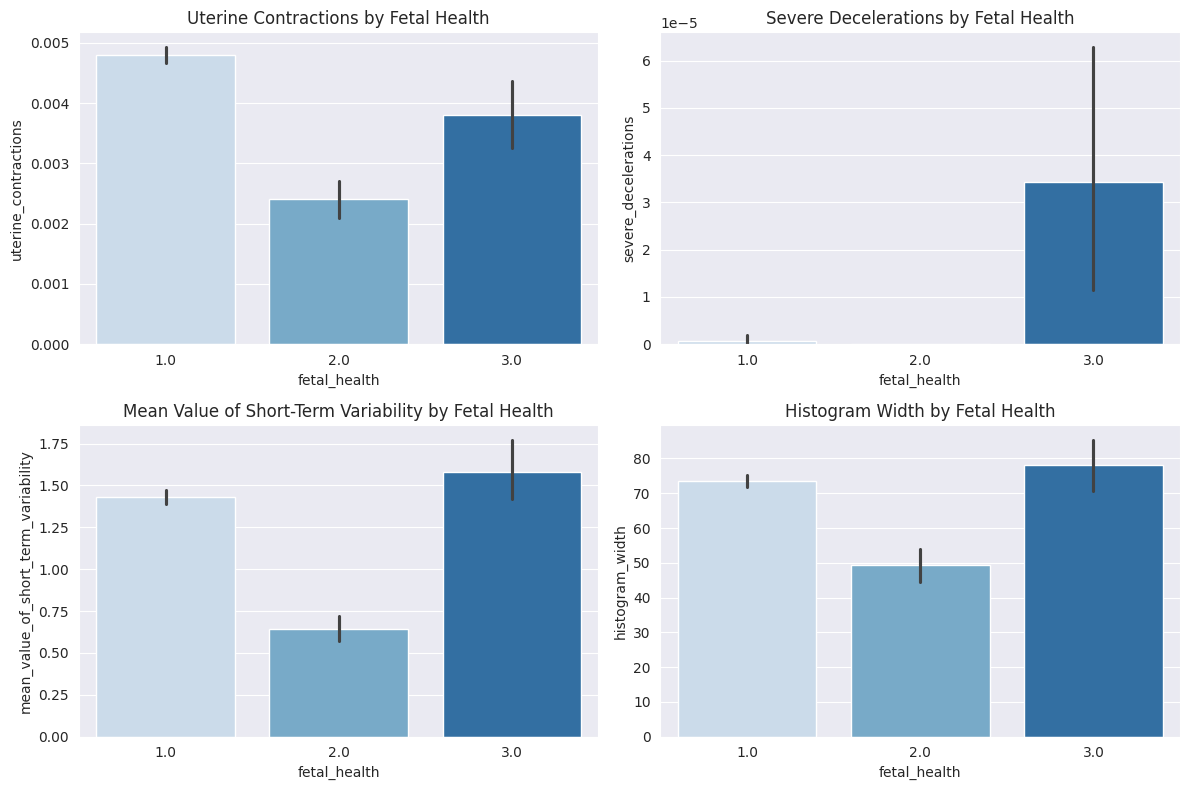

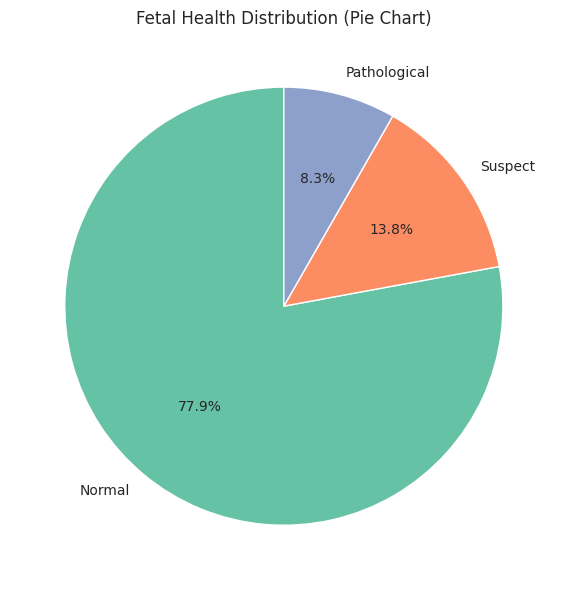

<ipython-input-8-062315a664a9>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fetal_health', y='uterine_contractions', data=df, palette='Set1')


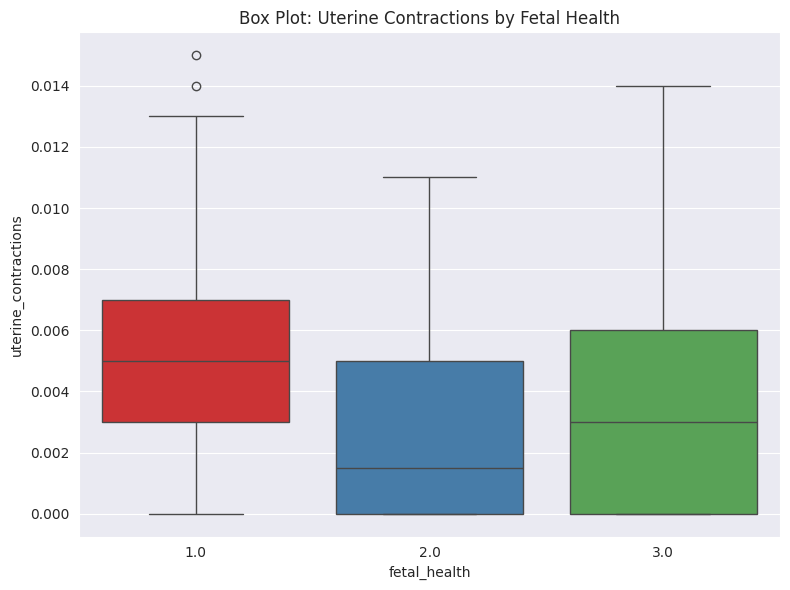

<ipython-input-8-062315a664a9>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fetal_health', y='uterine_contractions', data=df, palette='Set1')


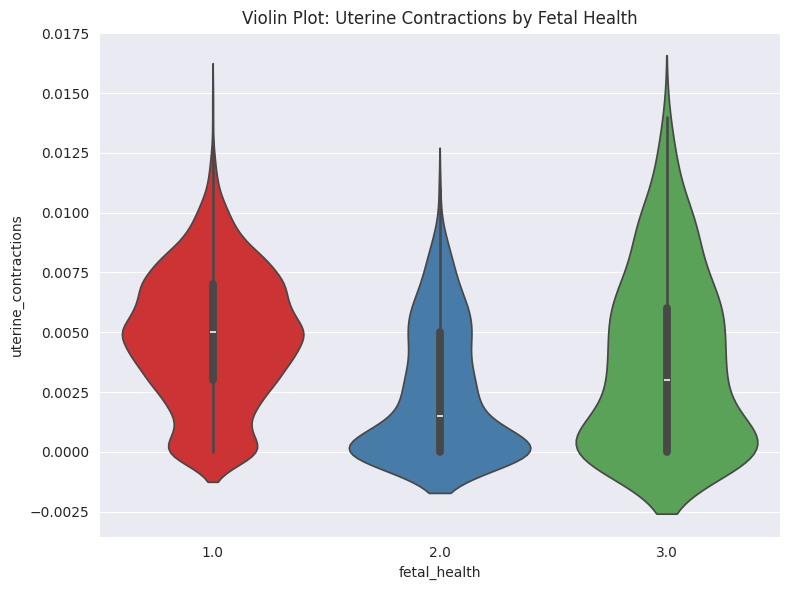

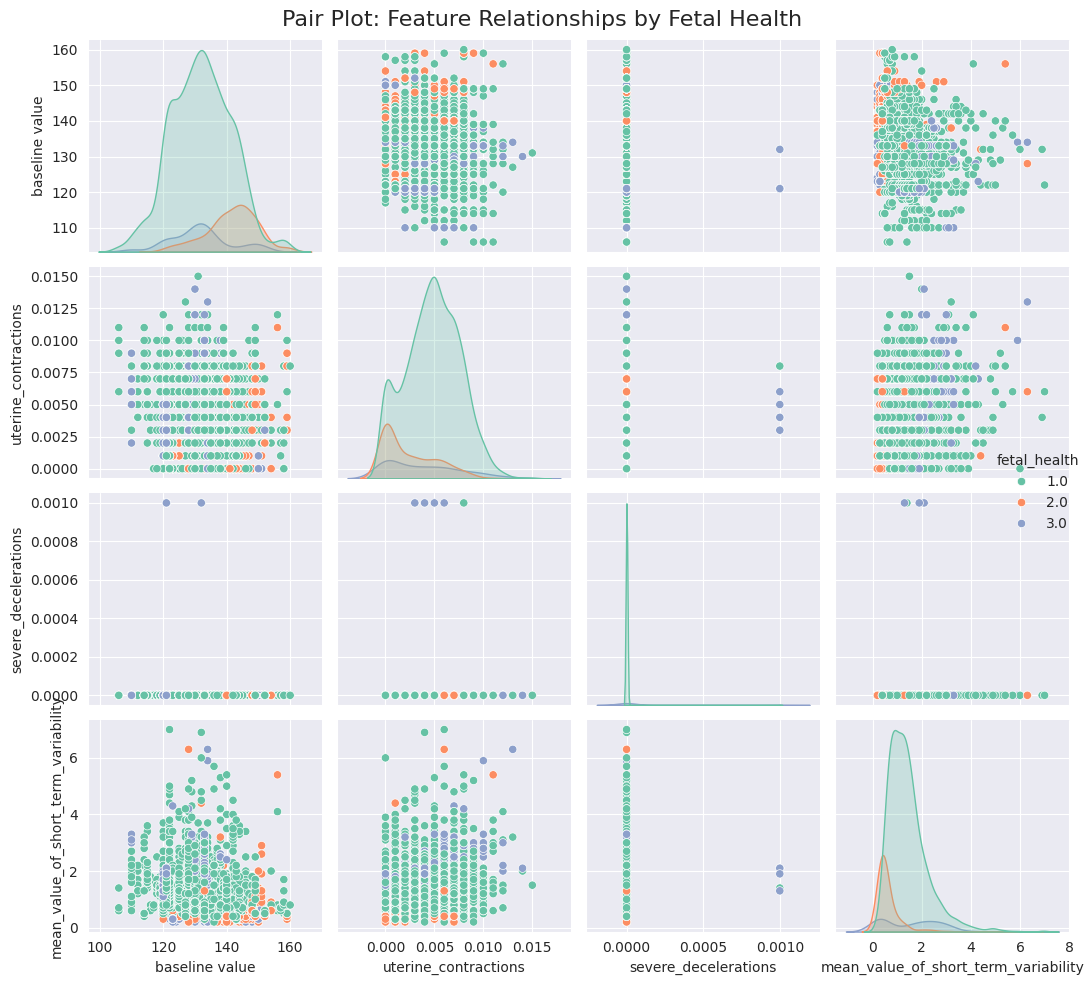

0 0.8321513002364066
1 0.851063829787234
2 0.9929078014184397
3 0.8957345971563981
4 0.7417061611374408


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:02:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


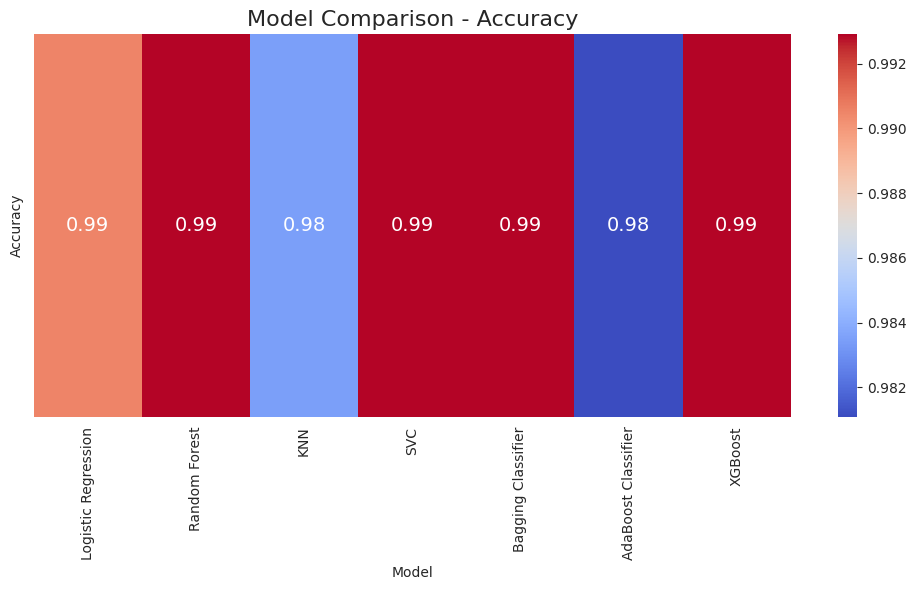

In [8]:
# Barplots for various features by fetal health (Updated Colors)
plt.figure(figsize=(12, 8))  # Reduced size of the plot
plt.subplot(2, 2, 1)
sns.barplot(x='fetal_health', y='uterine_contractions', data=df, palette='Blues')
plt.title('Uterine Contractions by Fetal Health')

plt.subplot(2, 2, 2)
sns.barplot(x='fetal_health', y='severe_decelerations', data=df, palette='Blues')
plt.title('Severe Decelerations by Fetal Health')

plt.subplot(2, 2, 3)
sns.barplot(x='fetal_health', y='mean_value_of_short_term_variability', data=df, palette='Blues')
plt.title('Mean Value of Short-Term Variability by Fetal Health')

plt.subplot(2, 2, 4)
sns.barplot(x='fetal_health', y='histogram_width', data=df, palette='Blues')
plt.title('Histogram Width by Fetal Health')

plt.tight_layout()
plt.show()

# Pie chart for fetal health distribution (Updated Colors)
plt.figure(figsize=(8, 6))
fetal_health_counts = df['fetal_health'].value_counts()
labels = ['Normal', 'Suspect', 'Pathological']
plt.pie(fetal_health_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', 3))
plt.title('Fetal Health Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

# Box plot for uterine contractions by fetal health (New Addition)
plt.figure(figsize=(8, 6))
sns.boxplot(x='fetal_health', y='uterine_contractions', data=df, palette='Set1')
plt.title('Box Plot: Uterine Contractions by Fetal Health')
plt.tight_layout()
plt.show()

# Violin plot for uterine contractions by fetal health (New Addition)
plt.figure(figsize=(8, 6))
sns.violinplot(x='fetal_health', y='uterine_contractions', data=df, palette='Set1')
plt.title('Violin Plot: Uterine Contractions by Fetal Health')
plt.tight_layout()
plt.show()

# Pair plot (Updated Colors)
sns.pairplot(df[['baseline value', 'uterine_contractions', 'severe_decelerations', 'mean_value_of_short_term_variability', 'fetal_health']], hue='fetal_health', palette='Set2')
plt.suptitle('Pair Plot: Feature Relationships by Fetal Health', fontsize=16)
plt.tight_layout()
plt.show()

# Preparing data for training
x = df.drop(columns='fetal_health')
y = df['fetal_health']

# Convert fetal_health to integer labels
y = y - 1  # Convert 1, 2, 3 to 0, 1, 2

# Feature selection using RFE
model = RandomForestClassifier(n_estimators=10)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x, y)
selected_features_rfe = x.columns[fit.support_]
x = x[selected_features_rfe]

# Cross-validation with Random Forest model
kfold = KFold(n_splits=5)
model = RandomForestClassifier(n_estimators=10)
fold_dic = {}

for i, (train_index, test_index) in enumerate(kfold.split(x)):
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]

    fold_dic[i] = {"train": train_index, 'test': test_index}
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(i, accuracy_score(y_test, y_pred))

# Train-test split for model comparison
x_train = x.iloc[fold_dic[2]['train'], :]
y_train = y.iloc[fold_dic[2]['train']]
x_test = x.iloc[fold_dic[2]['test'], :]
y_test = y.iloc[fold_dic[2]['test']]

# Define models for comparison (removed Decision Tree and Naive Bayes, added ensemble models)
model_dic = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVC": SVC(kernel='linear'),
    "Bagging Classifier": BaggingClassifier(n_estimators=10),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate models, store accuracies
acc_dic = {}
for (i, model) in model_dic.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_dic[i] = accuracy_score(y_test, y_pred)

# Heatmap for Model Comparison - Accuracy (Updated Colors)
plt.figure(figsize=(10, 6))  # Reduced size of the plot
df_acc = pd.DataFrame(list(acc_dic.items()), columns=['Model', 'Accuracy'])
df_acc = df_acc.set_index('Model')

# Use heatmap for better visualization
sns.heatmap(df_acc.T, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', annot_kws={"size": 14})
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.tight_layout()  # Automatically adjusts subplot parameters to make space for labels
plt.show()

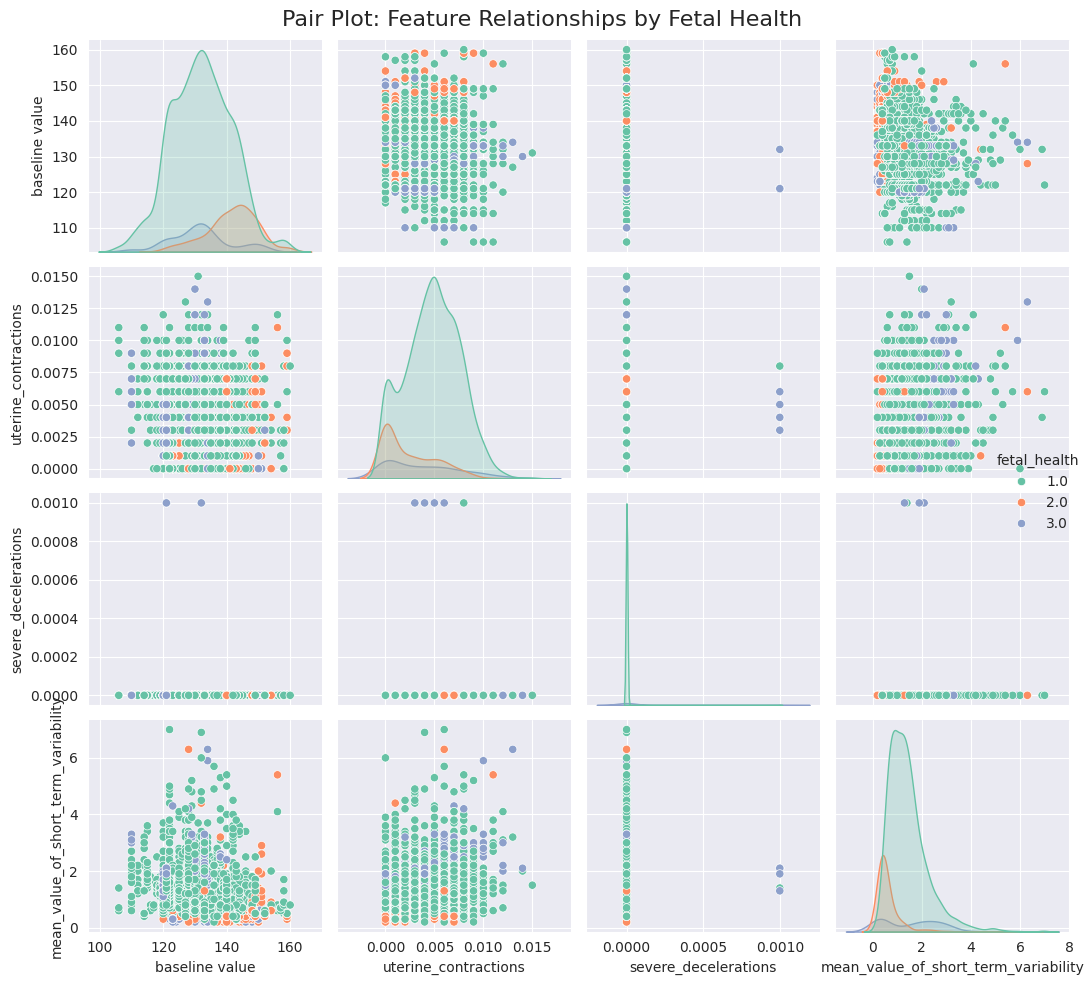

0 0.83451536643026
1 0.8321513002364066
2 0.9952718676122931
3 0.8909952606635071
4 0.7511848341232228


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:05:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


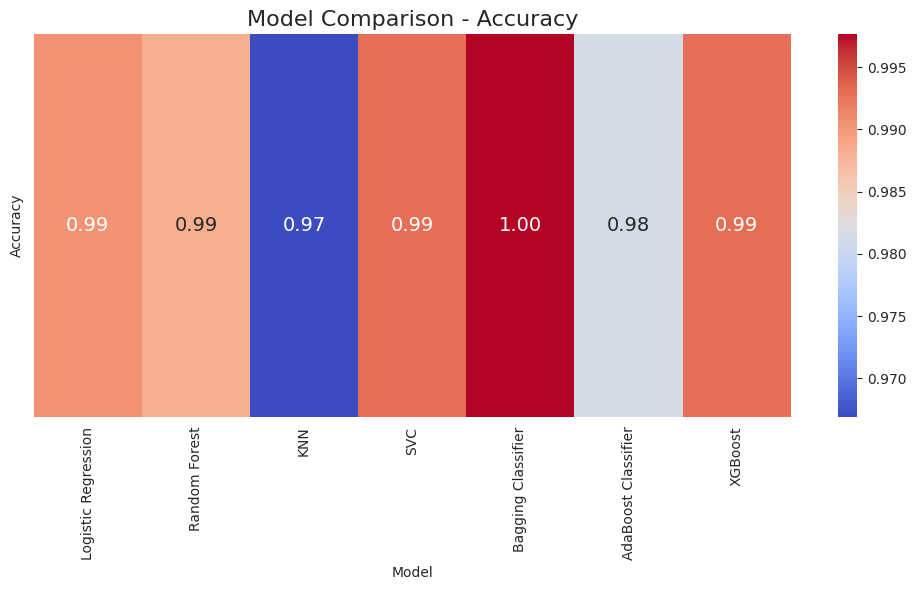

In [10]:
# Pair plot (Updated Colors)
sns.pairplot(df[['baseline value', 'uterine_contractions', 'severe_decelerations', 'mean_value_of_short_term_variability', 'fetal_health']], hue='fetal_health', palette='Set2')
plt.suptitle('Pair Plot: Feature Relationships by Fetal Health', fontsize=16)
plt.tight_layout()
plt.show()

# Preparing data for training
x = df.drop(columns='fetal_health')
y = df['fetal_health']

# Convert fetal_health to integer labels
y = y - 1  # Convert 1, 2, 3 to 0, 1, 2

# Feature selection using RFE
model = RandomForestClassifier(n_estimators=10)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(x, y)
selected_features_rfe = x.columns[fit.support_]
x = x[selected_features_rfe]

# Cross-validation with Random Forest model
kfold = KFold(n_splits=5)
model = RandomForestClassifier(n_estimators=10)
fold_dic = {}

for i, (train_index, test_index) in enumerate(kfold.split(x)):
    x_train = x.iloc[train_index, :]
    y_train = y.iloc[train_index]
    x_test = x.iloc[test_index, :]
    y_test = y.iloc[test_index]

    fold_dic[i] = {"train": train_index, 'test': test_index}
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(i, accuracy_score(y_test, y_pred))

# Train-test split for model comparison
x_train = x.iloc[fold_dic[2]['train'], :]
y_train = y.iloc[fold_dic[2]['train']]
x_test = x.iloc[fold_dic[2]['test'], :]
y_test = y.iloc[fold_dic[2]['test']]

# Define models for comparison (removed Decision Tree and Naive Bayes, added ensemble models)
model_dic = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVC": SVC(kernel='linear'),
    "Bagging Classifier": BaggingClassifier(n_estimators=10),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate models, store accuracies
acc_dic = {}
for (i, model) in model_dic.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc_dic[i] = accuracy_score(y_test, y_pred)

# Heatmap for Model Comparison - Accuracy (Updated Colors)
plt.figure(figsize=(10, 6))  # Reduced size of the plot
df_acc = pd.DataFrame(list(acc_dic.items()), columns=['Model', 'Accuracy'])
df_acc = df_acc.set_index('Model')

# Use heatmap for better visualization
sns.heatmap(df_acc.T, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', annot_kws={"size": 14})
plt.title('Model Comparison - Accuracy', fontsize=16)
plt.tight_layout()  # Automatically adjusts subplot parameters to make space for labels
plt.show()